In [1]:
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/anishvakalapudi/Desktop/Schema_3.csv")

In [3]:
df.loc[:,"cough"]


0        n
1        n
2        n
3        n
4        n
        ..
15529    n
15530    n
15531    n
15532    n
15533    n
Name: cough, Length: 15534, dtype: object

<AxesSubplot:>

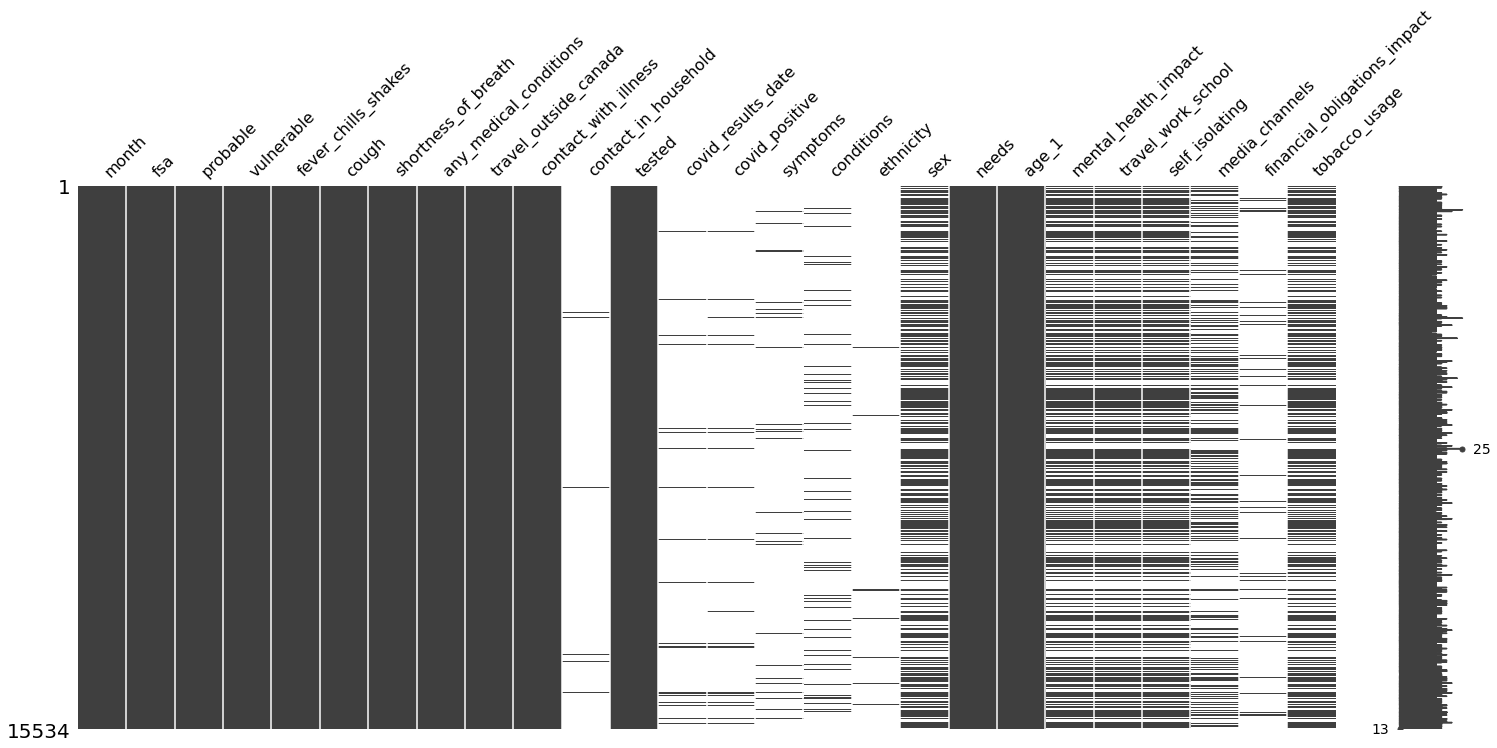

In [4]:
import missingno as msno


msno.matrix(df)

In [5]:
df.fsa.duplicated().sum()


15225

In [6]:
df.isnull().any()

month                           False
fsa                             False
probable                        False
vulnerable                      False
fever_chills_shakes             False
cough                           False
shortness_of_breath             False
any_medical_conditions          False
travel_outside_canada           False
contact_with_illness            False
contact_in_household             True
tested                          False
covid_results_date               True
covid_positive                   True
symptoms                         True
conditions                       True
ethnicity                        True
sex                              True
needs                           False
age_1                           False
mental_health_impact             True
travel_work_school               True
self_isolating                   True
media_channels                   True
financial_obligations_impact     True
tobacco_usage                    True
dtype: bool

In [7]:
df.isnull().mean().round(4).mul(100).sort_values(ascending=False)

contact_in_household            98.98
ethnicity                       98.08
covid_results_date              97.29
covid_positive                  96.85
symptoms                        94.90
financial_obligations_impact    94.10
conditions                      90.80
media_channels                  63.29
tobacco_usage                   44.14
self_isolating                  44.13
travel_work_school              44.12
sex                             44.11
mental_health_impact            44.08
needs                            0.00
probable                         0.00
vulnerable                       0.00
age_1                            0.00
contact_with_illness             0.00
travel_outside_canada            0.00
fever_chills_shakes              0.00
cough                            0.00
shortness_of_breath              0.00
fsa                              0.00
any_medical_conditions           0.00
tested                           0.00
month                            0.00
dtype: float

In [8]:
df.fsa.unique()

array(['M4P', 'M9P', 'K0L', 'N9E', 'L2N', 'M6S', 'M4J', 'M4Y', 'N6J',
       'L4J', 'L1V', 'N0G', 'N5Y', 'M9W', 'M4K', 'M5V', 'M2H', 'M4M',
       'M3A', 'L5N', 'L6R', 'K2G', 'L4Z', 'K7M', 'N1R', 'K1V', 'L4H',
       'M6E', 'M1T', 'K1J', 'M8Z', 'M2J', 'K0G', 'L3C', 'L4C', 'L6M',
       'K8N', 'N2M', 'M3C', 'L6H', 'L5B', 'L6J', 'L0K', 'L8K', 'L4N',
       'N0A', 'L1N', 'M1P', 'P0T', 'L0E', 'L5M', 'L6Z', 'M1S', 'M2N',
       'L4A', 'N0L', 'K1N', 'K0C', 'N0K', 'K0B', 'M4E', 'K0K', 'L6S',
       'M1E', 'P1B', 'M9A', 'L8J', 'M6J', 'L3T', 'K8A', 'L9Z', 'L5G',
       'K9H', 'M6R', 'K2J', 'L1K', 'N5Z', 'K2P', 'L0L', 'P6A', 'L4G',
       'L7G', 'L9B', 'K0E', 'M8Y', 'N3R', 'K7P', 'M5M', 'L0M', 'L9Y',
       'M1B', 'L3M', 'L6C', 'N4G', 'L1T', 'P3E', 'K2K', 'M3H', 'M5A',
       'L6V', 'M4C', 'N5W', 'L6L', 'L2R', 'M1C', 'K1S', 'L6A', 'L4P',
       'L5J', 'M9B', 'L9S', 'L9C', 'N5X', 'L4L', 'M1W', 'M6K', 'L7M',
       'N2E', 'M9V', 'L0S', 'P7B', 'N2K', 'K2S', 'L0R', 'P7C', 'M5R',
       'M4V', 'L5L',

In [9]:
pd.crosstab([df.tobacco_usage],df.probable,margins=True)

probable,n,y,All
tobacco_usage,,,
n,6206,88,6294
quitSmoking,1408,15,1423
y,932,29,961
All,8546,132,8678


In [10]:
df['province'] = df.fsa.str[0]

In [11]:
print(df.province)

0        M
1        M
2        K
3        N
4        L
        ..
15529    M
15530    K
15531    M
15532    M
15533    K
Name: province, Length: 15534, dtype: object


In [12]:
df.head

<bound method NDFrame.head of        month  fsa probable vulnerable fever_chills_shakes cough  \
0      April  M4P        n          n                   n     n   
1      April  M9P        n          n                   n     n   
2      April  K0L        n          n                   n     n   
3      April  N9E        n          n                   n     n   
4      April  L2N        n          n                   n     n   
...      ...  ...      ...        ...                 ...   ...   
15529   July  M6P        n          n                   n     n   
15530   July  K1R        n          n                   n     n   
15531   July  M4M        n          n                   n     n   
15532   July  M6P        n          y                   n     n   
15533   July  K2H        n          n                   n     n   

      shortness_of_breath any_medical_conditions travel_outside_canada  \
0                       n                      y                     n   
1                

In [13]:
df['province'].value_counts()

M    5349
L    5345
K    2463
N    2124
P     253
Name: province, dtype: int64

In [14]:
df['mh'] = df['mental_health_impact'].map(
                   {'positively':2 ,'noImpact':1 ,'negatively':0})
  

In [15]:
df['mh'].values[1]

1.0

In [16]:
pd.crosstab([df.province],df.mh,margins=True)

mh,0.0,1.0,2.0,All
province,,,,
K,742,694,66,1502
L,1437,1462,99,2998
M,1501,1085,106,2692
N,660,596,68,1324
P,77,85,9,171
All,4417,3922,348,8687


In [17]:
pd.crosstab(df.province, df.mental_health_impact, normalize='index')

mental_health_impact,negatively,noImpact,positively
province,,,
K,0.494008,0.462051,0.043941
L,0.479320,0.487658,0.033022
M,0.557578,0.403046,0.039376
N,0.498489,0.450151,0.051360
P,0.450292,0.497076,0.052632


In [18]:
pd.crosstab(df.province, df.tobacco_usage, normalize='index')

tobacco_usage,n,quitSmoking,y
province,,,
K,0.716378,0.182423,0.101198
L,0.725176,0.153460,0.121364
M,0.741636,0.165056,0.093309
N,0.704683,0.166163,0.129154
P,0.707602,0.152047,0.140351


In [19]:
pd.crosstab(df.province, df.self_isolating, normalize='index')

self_isolating,n,y
province,,
K,0.197071,0.802929
L,0.208152,0.791848
M,0.200743,0.799257
N,0.227513,0.772487
P,0.274854,0.725146


In [20]:
pd.crosstab(df.ethnicity, df.province, normalize='index')

province,K,L,M,N,P
ethnicity,,,,,
black/african;caucasian,0.0,0.214286,0.50,0.285714,0.0
black/african;caucasian;hispanic/latino,0.0,0.000000,1.00,0.000000,0.0
black/african;hispanic/latino,0.0,0.000000,1.00,0.000000,0.0
black/african;other,0.0,0.000000,1.00,0.000000,0.0
black/african;south asian,0.0,0.000000,1.00,0.000000,0.0
...,...,...,...,...,...
south asian;east asian,0.0,0.250000,0.75,0.000000,0.0
south asian;east asian;caucasian,0.0,1.000000,0.00,0.000000,0.0
south asian;other,0.0,0.000000,0.80,0.000000,0.2


In [21]:
pd.crosstab(df.travel_work_school, df.mh, margins=True)

mh,0.0,1.0,2.0,All
travel_work_school,,,,
alwaysWorkFromHome,284,271,23,578
didntTravelBefore,1053,1244,74,2371
non: j'ai toujours travaille de chez moi.,1,0,0,1
stillTravelEssential,470,422,30,922
stillTravelNonEssential,90,100,8,198
stoppedTravelling,2513,1884,213,4610
All,4411,3921,348,8680


In [22]:
sns.set_style('darkgrid')

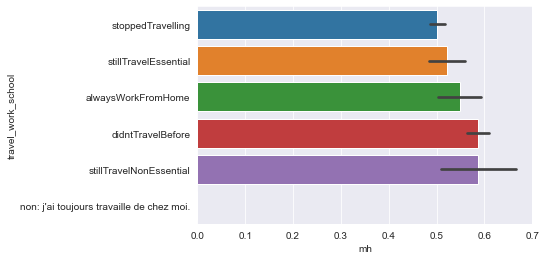

In [23]:
sns.barplot(x = 'mh', y= 'travel_work_school', data=df);

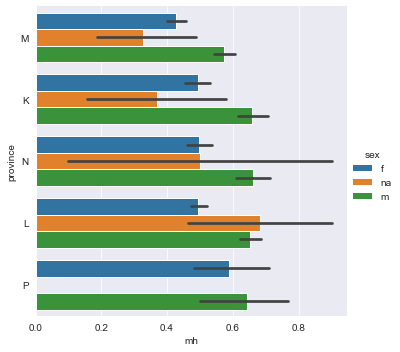

In [24]:
sns.catplot(data=df, x='mh', y='province', hue='sex', kind='bar');

In [25]:
df1=df.drop(columns=['contact_in_household', 'covid_results_date', 'covid_positive','symptoms','conditions','ethnicity','financial_obligations_impact', 'media_channels', 'travel_work_school'])

In [26]:
df1.head

<bound method NDFrame.head of        month  fsa probable vulnerable fever_chills_shakes cough  \
0      April  M4P        n          n                   n     n   
1      April  M9P        n          n                   n     n   
2      April  K0L        n          n                   n     n   
3      April  N9E        n          n                   n     n   
4      April  L2N        n          n                   n     n   
...      ...  ...      ...        ...                 ...   ...   
15529   July  M6P        n          n                   n     n   
15530   July  K1R        n          n                   n     n   
15531   July  M4M        n          n                   n     n   
15532   July  M6P        n          y                   n     n   
15533   July  K2H        n          n                   n     n   

      shortness_of_breath any_medical_conditions travel_outside_canada  \
0                       n                      y                     n   
1                

<AxesSubplot:>

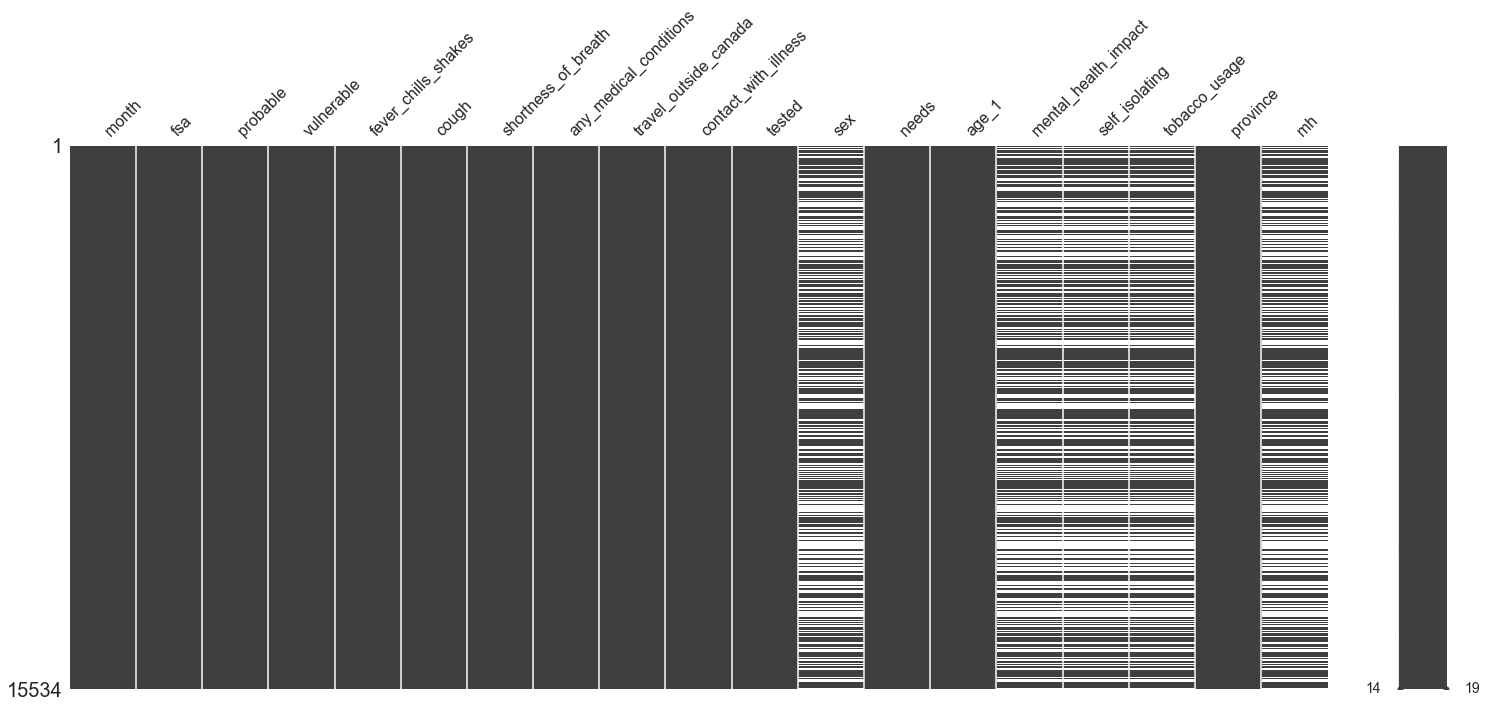

In [27]:
msno.matrix(df1)

In [28]:
df2=df1.dropna(subset=['mental_health_impact'])

<AxesSubplot:>

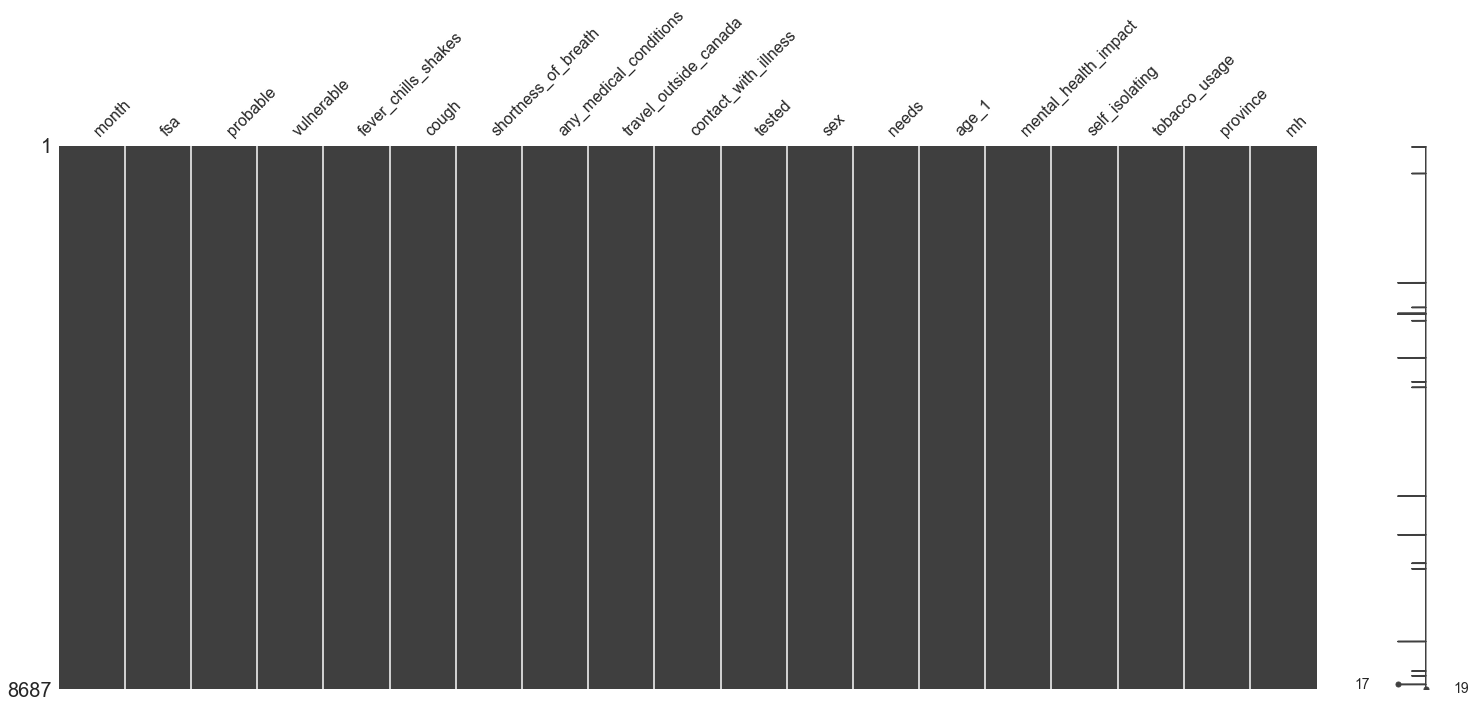

In [29]:
msno.matrix(df2)

In [30]:
percent_missing = df2.isnull().sum() * 100 / len(df)

In [31]:
print(percent_missing)

month                     0.000000
fsa                       0.000000
probable                  0.000000
vulnerable                0.000000
fever_chills_shakes       0.000000
cough                     0.000000
shortness_of_breath       0.000000
any_medical_conditions    0.000000
travel_outside_canada     0.000000
contact_with_illness      0.000000
tested                    0.000000
sex                       0.057937
needs                     0.000000
age_1                     0.000000
mental_health_impact      0.000000
self_isolating            0.051500
tobacco_usage             0.057937
province                  0.000000
mh                        0.000000
dtype: float64


In [32]:
df4=df2.drop(columns=['month', 'fsa', 'probable','vulnerable','fever_chills_shakes','cough',
                      'shortness_of_breath','any_medical_conditions','travel_outside_canada', 'contact_with_illness',
                      'tested', 'needs', 'age_1', 'mental_health_impact', 'province'  ])

In [33]:
df2 = df2.replace(to_replace='na', value=np.nan)

In [34]:
df4['sex'] = df4['sex'].map(
                   {'f':0 ,'m':1})

In [35]:
df4['self_isolating'] = df4['self_isolating'].map(
                   {'y':1 ,'n':0})

In [36]:
df4['tobacco_usage'] = df4['tobacco_usage'].map(
                   {'y':2, 'quitSmoking': 1 ,'n':0})

In [37]:
df4

,sex,self_isolating,tobacco_usage,mh
1,0.0,1.0,0.0,1.0
5,0.0,1.0,1.0,1.0
6,0.0,1.0,0.0,0.0
10,NaN,1.0,2.0,2.0
11,0.0,1.0,0.0,1.0
...,...,...,...,...
15525,0.0,0.0,0.0,0.0
15526,0.0,0.0,0.0,1.0
15527,0.0,0.0,2.0,0.0
15532,1.0,0.0,0.0,1.0


In [38]:
df4 = df4.loc[:,['mh','sex','self_isolating', 'tobacco_usage']]

In [39]:
cat_dummies = pd.get_dummies(df4, columns=['sex', 'mh', 'self_isolating', 'tobacco_usage'], drop_first = True)
cat_dummies.head(15533)

,sex_1.0,mh_1.0,mh_2.0,self_isolating_1.0,tobacco_usage_1.0,tobacco_usage_2.0
1,0,1,0,1,0,0
5,0,1,0,1,1,0
6,0,0,0,1,0,0
10,0,0,1,1,0,1
11,0,1,0,1,0,0
...,...,...,...,...,...,...
15525,0,0,0,0,0,0
15526,0,1,0,0,0,0
15527,0,0,0,0,0,1
15532,1,1,0,0,0,0


In [40]:
df4 = df4.drop(['mh', 'sex', 'self_isolating', 'tobacco_usage'], axis=1)
df4 = pd.concat([df4, cat_dummies], axis=1)

In [41]:
df4

,sex_1.0,mh_1.0,mh_2.0,self_isolating_1.0,tobacco_usage_1.0,tobacco_usage_2.0
1,0,1,0,1,0,0
5,0,1,0,1,1,0
6,0,0,0,1,0,0
10,0,0,1,1,0,1
11,0,1,0,1,0,0
...,...,...,...,...,...,...
15525,0,0,0,0,0,0
15526,0,1,0,0,0,0
15527,0,0,0,0,0,1
15532,1,1,0,0,0,0


In [42]:
from sklearn.impute import KNNImputer

In [43]:
imputer = KNNImputer(n_neighbors=5)
df4 = pd.DataFrame(imputer.fit_transform(df4),columns = df4.columns)

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df4 = pd.DataFrame(scaler.fit_transform(df4), columns = df4.columns)
df4.head()

,sex_1.0,mh_1.0,mh_2.0,self_isolating_1.0,tobacco_usage_1.0,tobacco_usage_2.0
0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0


In [45]:
df4

,sex_1.0,mh_1.0,mh_2.0,self_isolating_1.0,tobacco_usage_1.0,tobacco_usage_2.0
0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
8682,0.0,0.0,0.0,0.0,0.0,0.0
8683,0.0,1.0,0.0,0.0,0.0,0.0
8684,0.0,0.0,0.0,0.0,0.0,1.0
8685,1.0,1.0,0.0,0.0,0.0,0.0


In [46]:
df4.isna().any()

sex_1.0               False
mh_1.0                False
mh_2.0                False
self_isolating_1.0    False
tobacco_usage_1.0     False
tobacco_usage_2.0     False
dtype: bool

In [47]:
df2 = df2.reset_index()

In [48]:
df2[[ 'sex_1.0', 'mh_1.0', 'self_isolating_1.0', 'tobacco_usage_1.0','tobacco_usage_2.0' ]] = df4[['sex_1.0', 'mh_1.0', 'self_isolating_1.0', 'tobacco_usage_1.0','tobacco_usage_2.0' ]].astype(float)

In [49]:
df2 = df2.drop('tobacco_usage', axis=1)

In [50]:
df2 = df2.fillna(np.nan)

In [51]:
df2

,index,month,fsa,probable,vulnerable,fever_chills_shakes,cough,shortness_of_breath,any_medical_conditions,travel_outside_canada,...,age_1,mental_health_impact,self_isolating,province,mh,sex_1.0,mh_1.0,self_isolating_1.0,tobacco_usage_1.0,tobacco_usage_2.0
0,1,April,M9P,n,n,n,n,n,y,n,...,<26,noImpact,y,M,1.0,0.0,1.0,1.0,0.0,0.0
1,5,April,M6S,n,n,n,n,n,y,n,...,26-44,noImpact,y,M,1.0,0.0,1.0,1.0,1.0,0.0
2,6,April,M4J,n,n,n,n,n,y,n,...,45-64,negatively,y,M,0.0,0.0,0.0,1.0,0.0,0.0
3,10,April,L1V,n,n,n,n,n,y,n,...,45-64,positively,y,L,2.0,0.0,0.0,1.0,0.0,1.0
4,11,April,N0G,n,n,n,n,n,y,n,...,45-64,noImpact,y,N,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8682,15525,July,K9H,n,y,n,n,n,y,n,...,<26,negatively,n,K,0.0,0.0,0.0,0.0,0.0,0.0
8683,15526,July,M6K,n,n,n,n,n,y,n,...,45-64,noImpact,n,M,1.0,0.0,1.0,0.0,0.0,0.0
8684,15527,July,N1H,n,n,n,n,n,y,n,...,26-44,negatively,n,N,0.0,0.0,0.0,0.0,0.0,1.0
8685,15532,July,M6P,n,y,n,n,n,y,n,...,>65,noImpact,n,M,1.0,1.0,1.0,0.0,0.0,0.0


In [52]:
df2.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8682    False
8683    False
8684    False
8685    False
8686    False
Length: 8687, dtype: bool

In [53]:
df2 = df2.drop('mh_1.0', axis=1)

In [54]:
df2 = df2.replace(to_replace='na', value=np.nan)

In [65]:
df3 = df2.drop('fsa', axis=1)

In [72]:
!pip install tableone 
from tableone import TableOne, load_dataset
import pandas as pd

mytable = TableOne(df3, pval=False)
print(mytable.tabulate(tablefmt = "fancy_grid"))
mytable.to_html('mytable.html')

╒═══════════════════════════════╤══════════════════╤═══════════╤═════════════════╕
│                               │                  │ Missing   │ Overall         │
╞═══════════════════════════════╪══════════════════╪═══════════╪═════════════════╡
│ n                             │                  │           │ 8687            │
├───────────────────────────────┼──────────────────┼───────────┼─────────────────┤
│ index, mean (SD)              │                  │ 0         │ 7776.6 (4497.4) │
├───────────────────────────────┼──────────────────┼───────────┼─────────────────┤
│ probable, n (%)               │ n                │ 0         │ 8554 (98.5)     │
├───────────────────────────────┼──────────────────┼───────────┼─────────────────┤
│                               │ y                │           │ 133 (1.5)       │
├───────────────────────────────┼──────────────────┼───────────┼─────────────────┤
│ vulnerable, n (%)             │ n                │ 0         │ 6602 (76.0)     │
├───

In [66]:
df3=df3.drop('month', axis=1)

In [55]:
df4

,sex_1.0,mh_1.0,mh_2.0,self_isolating_1.0,tobacco_usage_1.0,tobacco_usage_2.0
0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
8682,0.0,0.0,0.0,0.0,0.0,0.0
8683,0.0,1.0,0.0,0.0,0.0,0.0
8684,0.0,0.0,0.0,0.0,0.0,1.0
8685,1.0,1.0,0.0,0.0,0.0,0.0


In [56]:
df4.isna().any()

sex_1.0               False
mh_1.0                False
mh_2.0                False
self_isolating_1.0    False
tobacco_usage_1.0     False
tobacco_usage_2.0     False
dtype: bool

In [57]:
X = df2[[ 'probable', 'vulnerable', 'fever_chills_shakes', 'cough', 
         'shortness_of_breath', 'any_medical_conditions', 'travel_outside_canada', 'contact_with_illness', 'tested', 'sex_1.0', 'self_isolating_1.0', 'tobacco_usage_1.0', 
         'tobacco_usage_2.0']]
y = df2['mh']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [59]:
len(X_test)

1738

In [60]:
df2

,index,month,fsa,probable,vulnerable,fever_chills_shakes,cough,shortness_of_breath,any_medical_conditions,travel_outside_canada,...,needs,age_1,mental_health_impact,self_isolating,province,mh,sex_1.0,self_isolating_1.0,tobacco_usage_1.0,tobacco_usage_2.0
0,1,April,M9P,n,n,n,n,n,y,n,...,food,<26,noImpact,y,M,1.0,0.0,1.0,0.0,0.0
1,5,April,M6S,n,n,n,n,n,y,n,...,noneOfTheAbove,26-44,noImpact,y,M,1.0,0.0,1.0,1.0,0.0
2,6,April,M4J,n,n,n,n,n,y,n,...,emotionalSupport,45-64,negatively,y,M,0.0,0.0,1.0,0.0,0.0
3,10,April,L1V,n,n,n,n,n,y,n,...,noneOfTheAbove,45-64,positively,y,L,2.0,0.0,1.0,0.0,1.0
4,11,April,N0G,n,n,n,n,n,y,n,...,noneOfTheAbove,45-64,noImpact,y,N,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8682,15525,July,K9H,n,y,n,n,n,y,n,...,other,<26,negatively,n,K,0.0,0.0,0.0,0.0,0.0
8683,15526,July,M6K,n,n,n,n,n,y,n,...,emotionalSupport,45-64,noImpact,n,M,1.0,0.0,0.0,0.0,0.0
8684,15527,July,N1H,n,n,n,n,n,y,n,...,noneOfTheAbove,26-44,negatively,n,N,0.0,0.0,0.0,0.0,1.0
8685,15532,July,M6P,n,y,n,n,n,y,n,...,noneOfTheAbove,>65,noImpact,n,M,1.0,1.0,0.0,0.0,0.0


In [61]:
df2['probable'] = df['probable'].map({'n':0 ,'y':1 })

In [62]:
df2['self_isolating'] = df['self_isolating'].map({'n':0 ,'y':1 })

In [63]:
df2['vulnerable'] = df['vulnerable'].map(
                   {'n':0 ,'y':1 })

In [64]:
df2['fever_chills_shakes'] = df['fever_chills_shakes'].map(
                   {'n':0 ,'y':1 })

In [65]:
df2['cough'] = df['cough'].map(
                   {'n':0 ,'y':1 })

In [66]:
df2['shortness_of_breath'] = df['shortness_of_breath'].map(
                   {'n':0 ,'y':1 })

In [67]:
df2['any_medical_conditions'] = df['any_medical_conditions'].map(
                   {'n':0 ,'y':1 })

In [68]:
df2['travel_outside_canada'] = df['travel_outside_canada'].map({'n':0 ,'y':1 })

In [69]:
df2['contact_with_illness'] = df['contact_with_illness'].map({'n':0 ,'y':1 })

In [70]:
df2['tested'] = df['tested'].map({'n':0 ,'y':1 })

In [71]:
df2['province'] = df['province'].map({'M':0 ,'L':1 ,'N':2 ,'K':3 ,'P' :4 })

In [72]:
df2['needs'] = df['needs'].map({'food':0 ,'noneOfTheAbove':1 ,'emotionalSupport':2 ,'other':3 ,'financialSupport' :4,'medication':5 })

In [73]:
X = df2[[ 'probable', 'vulnerable', 'any_medical_conditions', 'travel_outside_canada', 'tested', 'sex_1.0', 'self_isolating_1.0', ]]
y = df2['mh']

In [74]:
# Use numpy to convert to arrays
import numpy as np
# Saving feature names for later use
feature_list = list(df4.columns)

In [107]:
df2

,index,month,fsa,probable,vulnerable,fever_chills_shakes,cough,shortness_of_breath,any_medical_conditions,travel_outside_canada,...,needs,age_1,mental_health_impact,self_isolating,province,mh,sex_1.0,self_isolating_1.0,tobacco_usage_1.0,tobacco_usage_2.0
0,1,April,M9P,0,0,0,0,0,1,0,...,1,<26,noImpact,NaN,0,1.0,0.0,1.0,0.0,0.0
1,5,April,M6S,0,0,0,0,0,1,0,...,0,26-44,noImpact,1.0,0,1.0,0.0,1.0,1.0,0.0
2,6,April,M4J,0,0,0,0,0,1,0,...,1,45-64,negatively,NaN,3,0.0,0.0,1.0,0.0,0.0
3,10,April,L1V,0,0,0,0,0,1,0,...,1,45-64,positively,NaN,2,2.0,0.0,1.0,0.0,1.0
4,11,April,N0G,0,0,0,0,0,1,0,...,4,45-64,noImpact,NaN,1,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8681,15523,July,L6L,0,1,0,0,0,1,0,...,2,45-64,negatively,NaN,2,0.0,0.0,0.0,0.0,0.0
8682,15525,July,K9H,0,1,0,0,0,1,0,...,1,<26,negatively,1.0,2,0.0,0.0,0.0,0.0,0.0
8683,15526,July,M6K,0,1,0,0,0,1,0,...,1,45-64,noImpact,1.0,0,1.0,0.0,0.0,0.0,0.0
8684,15527,July,N1H,0,0,0,0,0,1,0,...,1,26-44,negatively,NaN,1,0.0,0.0,0.0,0.0,1.0


In [104]:
df2.drop(df2[df2['sex_1.0'] == 1.0].index, inplace = True)


In [108]:
def create_table1(dataframe):
    # Calculate statistics for numeric variables
    numeric_stats = dataframe.describe().transpose().reset_index()
    
    # Calculate count and unique count for categorical variables
    categorical_stats = dataframe.apply(lambda x: pd.Series({'Count': x.count(), 'Unique': x.nunique()})).transpose().reset_index()
    
    # Combine the statistics
    table1 = pd.merge(numeric_stats, categorical_stats, on='index')
    
    return table1.rename(columns={'index': 'Variable'})

# Create Table 1 for the sample dataset
table1_df = create_table1(df2)

# Display the result
print(table1_df)

                  Variable   count         mean          std  min      25%  \
0                    index  5586.0  8195.185643  4504.106484  1.0  4379.75   
1                 probable  5586.0     0.015038     0.121713  0.0     0.00   
2               vulnerable  5586.0     0.183852     0.387399  0.0     0.00   
3      fever_chills_shakes  5586.0     0.020050     0.140184  0.0     0.00   
4                    cough  5586.0     0.017007     0.129308  0.0     0.00   
5      shortness_of_breath  5586.0     0.012173     0.109669  0.0     0.00   
6   any_medical_conditions  5586.0     1.000000     0.000000  1.0     1.00   
7    travel_outside_canada  5586.0     0.002506     0.050004  0.0     0.00   
8     contact_with_illness  5586.0     0.011099     0.104776  0.0     0.00   
9                   tested  5586.0     0.015754     0.124532  0.0     0.00   
10                   needs  5586.0     1.588793     1.208627  0.0     1.00   
11          self_isolating  3158.0     0.842305     0.364512  0.

In [105]:
df3

In [78]:
df3 = df3.drop('age_1', axis=1)

In [79]:
df3 = df3.drop('mental_health_impact', axis=1)

In [80]:
df3 = df3.drop('self_isolating', axis=1)

In [81]:
df3 = df3.drop('province', axis=1)

In [82]:
df3 = df3.drop('sex', axis=1)

In [106]:
df3

In [99]:

def create_table1(dataframe):
    # Map 'Gender' column to labels (0 -> 'Female', 1 -> 'Male')
    dataframe['sex_1.0'] = dataframe['sex_1.0'].map({0: 'Female', 1: 'Male'})
    
    # Calculate statistics for numeric variables, grouped by 'Gender'
    numeric_stats = dataframe.groupby('sex_1.0').describe().transpose().reset_index()
    
    # Calculate count and unique count for categorical variables, grouped by 'Gender'
    categorical_stats = dataframe.groupby('sex_1.0').apply(lambda x: pd.Series({'Count': x.count(), 'Unique': x.nunique()})).transpose().reset_index()
    
    # Combine the statistics
    table1 = pd.merge(numeric_stats, categorical_stats, on=['sex_1.0'])
    
    return table1.rename(columns={'sex_1.0': 'Variable'})

# Create Table 1 for the sample dataset
table1_df = create_table1(df3)

# Display the result
print(table1_df)

KeyError: 'sex_1.0'

In [109]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [110]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (6515, 7)
Training Labels Shape: (6515,)
Testing Features Shape: (2172, 7)
Testing Labels Shape: (2172,)


In [111]:
train_features

,probable,vulnerable,any_medical_conditions,travel_outside_canada,tested,sex_1.0,self_isolating_1.0
7857,0,0,1,0,0,0.0,0.0
7778,0,0,1,0,0,0.0,0.0
478,0,0,1,0,0,0.0,1.0
1352,0,0,1,0,0,0.0,1.0
4372,0,0,1,0,0,0.0,1.0
...,...,...,...,...,...,...,...
5734,0,1,1,0,0,0.0,1.0
5191,0,0,1,0,0,1.0,0.0
5390,0,0,1,0,0,0.0,0.0
860,0,0,1,0,0,1.0,0.0


In [112]:
test_features

,probable,vulnerable,any_medical_conditions,travel_outside_canada,tested,sex_1.0,self_isolating_1.0
304,0,0,1,0,0,0.0,1.0
6349,0,0,1,0,0,0.0,1.0
8419,0,0,1,0,0,0.0,1.0
1670,0,0,1,0,0,0.0,1.0
6214,0,0,1,0,0,0.0,1.0
...,...,...,...,...,...,...,...
6529,0,0,1,0,0,0.0,1.0
4108,0,0,1,0,0,1.0,0.0
7757,0,0,1,0,0,0.0,1.0
3728,0,0,1,0,0,0.0,1.0


In [113]:
train_labels

7857    1.0
7778    1.0
478     1.0
1352    1.0
4372    0.0
       ... 
5734    0.0
5191    2.0
5390    0.0
860     0.0
7270    1.0
Name: mh, Length: 6515, dtype: float64

In [114]:
!pip install imbalanced-learn

In [115]:
from imblearn.under_sampling import RandomUnderSampler

In [116]:
#define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')


In [117]:
X_over, y_over = undersample.fit_resample(X, y)

In [118]:
X_over

,probable,vulnerable,any_medical_conditions,travel_outside_canada,tested,sex_1.0,self_isolating_1.0
0,0,0,1,0,0,0.0,1.0
1,0,0,1,0,0,0.0,1.0
2,0,0,1,0,0,0.0,1.0
3,0,0,1,0,0,1.0,0.0
4,0,0,1,0,0,0.0,1.0
...,...,...,...,...,...,...,...
4613,0,0,1,0,0,0.0,1.0
4614,0,0,1,0,0,0.0,0.0
4615,0,0,1,0,0,1.0,0.0
4616,0,0,1,0,0,1.0,0.0


In [119]:
y_over

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4613    2.0
4614    2.0
4615    2.0
4616    2.0
4617    2.0
Name: mh, Length: 4618, dtype: float64

In [120]:
from sklearn.model_selection import train_test_split
from collections import Counter
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over,test_size=0.2,random_state = 42)
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({1.0: 3155, 2.0: 274, 0.0: 265})
Testing target statistics: Counter({1.0: 767, 0.0: 83, 2.0: 74})


In [121]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [122]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [123]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8300865800865801


In [124]:
from sklearn.metrics import confusion_matrix

In [125]:
confusion_matrix(y_test, y_pred)

array([[  0,  83,   0],
       [  0, 767,   0],
       [  0,  74,   0]])

In [124]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred, average='macro', zero_division=1)
F1_score = metrics.f1_score(y_test, y_pred, average='macro', zero_division=1)

#metrics:
print({"Accuracy":Accuracy,"Precision":Precision,"F1_score":F1_score})

{'Accuracy': 0.8300865800865801, 'Precision': 0.9433621933621934, 'F1_score': 0.30238517642420654}


In [125]:
print(metrics.classification_report(y_test, y_pred, digits=3, zero_division=1))

              precision    recall  f1-score   support

         0.0      1.000     0.000     0.000        83
         1.0      0.830     1.000     0.907       767
         2.0      1.000     0.000     0.000        74

    accuracy                          0.830       924
   macro avg      0.943     0.333     0.302       924
weighted avg      0.859     0.830     0.753       924



In [126]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8300865800865801


In [127]:
from sklearn.metrics import confusion_matrix

In [128]:
confusion_matrix(y_test, y_pred)

array([[  0,  83,   0],
       [  0, 767,   0],
       [  0,  74,   0]])

In [129]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred, average='macro', zero_division=1)
F1_score = metrics.f1_score(y_test, y_pred, average='macro', zero_division=1)

#metrics:
print({"Accuracy":Accuracy,"Precision":Precision,"F1_score":F1_score})

{'Accuracy': 0.8300865800865801, 'Precision': 0.9433621933621934, 'F1_score': 0.30238517642420654}


In [130]:
Precision = metrics.precision_score(y_test, y_pred, average='macro', zero_division=1)
F1_score = metrics.f1_score(y_test, y_pred, average='macro', zero_division=1)

In [131]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train) 
xtest = sc_x.transform(X_test)
  
print (xtrain[0:10, :])

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
LogisticRegression(random_state=0)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)

print(metrics.classification_report(y_test, y_pred, digits=3, zero_division=1))



[[-0.12406882 -0.47541622  0.         -0.04658728 -0.12957828  1.18135098
   0.51821227]
 [-0.12406882 -0.47541622  0.         -0.04658728 -0.12957828  1.18135098
  -1.92971116]
 [-0.12406882 -0.47541622  0.         -0.04658728 -0.12957828  1.18135098
   0.51821227]
 [-0.12406882 -0.47541622  0.         -0.04658728 -0.12957828 -0.84648848
   0.51821227]
 [-0.12406882 -0.47541622  0.         -0.04658728 -0.12957828 -0.84648848
   0.51821227]
 [-0.12406882 -0.47541622  0.         -0.04658728 -0.12957828  1.18135098
   0.51821227]
 [-0.12406882 -0.47541622  0.         -0.04658728 -0.12957828 -0.84648848
  -1.92971116]
 [-0.12406882 -0.47541622  0.         -0.04658728 -0.12957828 -0.84648848
   0.51821227]
 [-0.12406882 -0.47541622  0.         -0.04658728 -0.12957828  1.18135098
   0.51821227]
 [-0.12406882 -0.47541622  0.         -0.04658728 -0.12957828 -0.84648848
   0.51821227]]
Confusion Matrix : 
 [[  0  83   0]
 [  0 767   0]
 [  0  74   0]]
              precision    recall  f1-scor

In [132]:
from sklearn.metrics import confusion_matrix

In [133]:
from sklearn import metrics

In [134]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [135]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.17 degrees.


In [136]:
predictions

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [137]:
print(metrics.classification_report(y_test, predictions, digits=3, zero_division=1))

              precision    recall  f1-score   support

         0.0      1.000     0.012     0.024        83
         1.0      0.831     0.999     0.907       767
         2.0      0.000     0.000     0.000        74

    accuracy                          0.830       924
   macro avg      0.610     0.337     0.310       924
weighted avg      0.779     0.830     0.755       924



In [133]:
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: tobacco_usage_2.0    Importance: 0.51
Variable: mh_1.0               Importance: 0.13
Variable: sex_1.0              Importance: 0.12
Variable: tobacco_usage_1.0    Importance: 0.1
Variable: self_isolating_1.0   Importance: 0.06
Variable: mh_2.0               Importance: 0.0


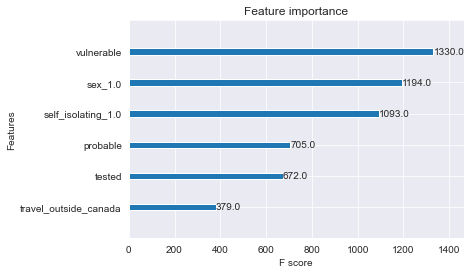

Accuracy: 83.01%
Thresh=0.000, n=7, Accuracy: 83.01%
Thresh=0.064, n=6, Accuracy: 83.01%
Thresh=0.082, n=5, Accuracy: 82.90%
Thresh=0.088, n=4, Accuracy: 83.01%
Thresh=0.130, n=3, Accuracy: 83.01%
Thresh=0.142, n=2, Accuracy: 83.01%
Thresh=0.493, n=1, Accuracy: 83.01%
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        83
         1.0       0.83      1.00      0.91       767
         2.0       0.00      0.00      0.00        74

    accuracy                           0.83       924
   macro avg       0.28      0.33      0.30       924
weighted avg       0.69      0.83      0.75       924



/Users/anishvakalapudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anishvakalapudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anishvakalapudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [134]:
# plot feature importance using built-in function
!pip install xgboost
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
pyplot.show()
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sorted(model.feature_importances_)
for thresh in thresholds:
 # select features using threshold
 selection = SelectFromModel(model, threshold=thresh, prefit=True)
 select_X_train = selection.transform(X_train)
 # train model
 selection_model = XGBClassifier()
 selection_model.fit(select_X_train, y_train)
 # eval model
 select_X_test = selection.transform(X_test)
 y_pred = selection_model.predict(select_X_test)
 predictions = [round(value) for value in y_pred]
 accuracy = accuracy_score(y_test, predictions)
 print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
print(classification_report(y_test, predictions))

In [101]:
count_of_ones = df2['sex_1.0'].value_counts().get(0, 1)

print("Number of occurrences of '1.0':", count_of_ones)


Number of occurrences of '1.0': 5586
